# Workshop 16: Dirty Water

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8. Wednesday January 16, 2024.*

## Introduction

In this exercise we apply a few simple concepts from the textbook to derive a safety standard to regulate spills in a chemical factory. You are asked to consider an economic and societal standard, then make a recommendation to the city council.

## Case Study

A city with population 10,000 uses an aquifer for its water supply, as illustrated in the figure. The city owns a factory in the region that manufactures hazardous chemicals, and recently a chemical spill occurred that resulted in 10 residents getting sick and total damages of  €7,000M*. The city is going to enforce stricter regulations on the factory, and _you have been hired to advise the city council on the maximum allowable probability of a spill occurring (per year)_. You will make a recommendation based on the more stringent criteria between economic and societal risk limits.

![sketch of factory, houses and contamination plume](./sketch.png)

Experts have been consulted and it appears under the current plan the probability of a spill is 1/100 per year. The city council is considering two strategies to upgrade the spill prevention system. A small upgrade would cost €25M and can reduce spill probability by a factor 10; a large upgrade with investment costs of €50M would reduce the probability by factor 100.

The city has also considered the regulations in a nearby region which uses a maximum allowable probability of 1 person getting sick as p_f=0.01. The city agrees with this, however, they are very much _risk averse_ (that's a hint!), regarding spills with more significant consequences.

_*M = million, so 7,000M is 7e9, or 7 billion. All costs in this exercise are expressed in units €M._

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>  

What is optimal strategy in terms of total cost of the system?
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   
</p>
</div>

$$
R = p_f \cdot D
$$

where $R$ is risk and $D$ is damages (€M). The total cost, $T$, for investment $I$ is:

$$
T = I + R
$$

| Strategy | Description | Investment, $I$ | Risk, $R$ | Total Cost, $C$ |
| :---: | :---: | :---: | :---: | :---: |
| 1 | do nothing | €0M | 0.01 $\cdot$ €7000 | €70M |
| 2 | small upgrade | €25M | 0.01/10 $\cdot$ €7000 | €32M |
| 3 | large upgrade | €50M | 0.01/100 $\cdot$ €7000 | €50.7M |

Conclusion: Strategy 2 (small upgrade) is economically optimal and corresponds with a safety standard of $p_f$ = 1/1000 per year.

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>End solution.</b>   
</p>
</div>

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>  

Assuming that the number of people in a future spill would also be 10 people, what is the maximum allowable spill probability based on societal risk standards?

Make a plot of the societal risk limit and add a point for the case of the city factory.
    
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

The goal is to create a limit line, <a href="https://mude.citg.tudelft.nl/book/pd/risk-evaluation/safety-standards.html#limits-for-individual-and-societal-risk" target="_blank">as described here</a>. The equation is of form:
    
$$
1 - F_N(n) \leq \frac{C}{n^\alpha}
$$
    
From the information provided, we can create a limit line where one point is provided from the guidelines of the neighboring city $p_f=0.01$ and $N=1$; thus $C=0.01$. If the city is risk averse, $\alpha=2$. As the factory spill causes 10 people to get sick, the maximum allowable probability is
    
$$
p_f/d=10/10.000=0.001\%
$$
    
$$
1 - F_N(n) \leq \frac{C}{n^\alpha} = \frac{0.01}{10^2} = 10^{-4} \;\;\textrm{per year}
$$
</p>
</div>

0.0001


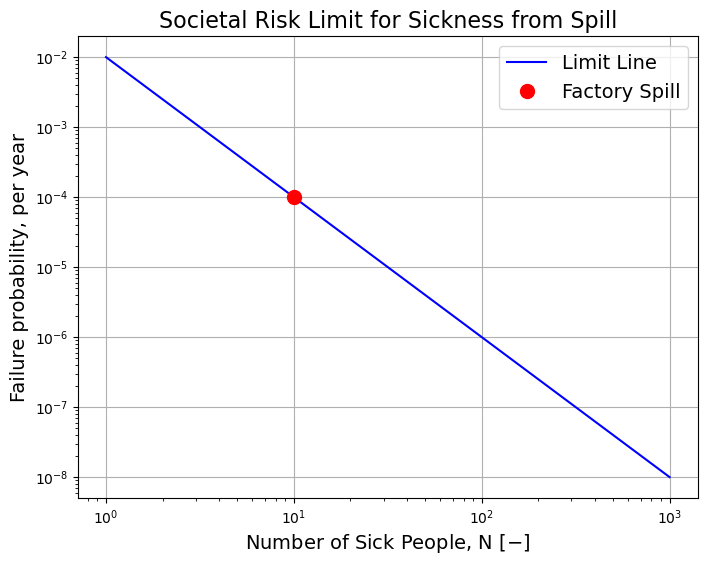

In [14]:
C = 0.01*1**2
alpha = 2

pf_societal = C/10**alpha
print(pf_societal)


N_values = np.array([1, 1000])
limit_line = C/N_values**alpha

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(N_values, limit_line, color='blue', markersize=10, label='Limit Line')
ax.plot(10, pf_societal, 'ro', markersize=10, label='Factory Spill')
ax.set_title('Societal Risk Limit for Sickness from Spill', fontsize=16)
ax.set_xlabel('Number of Sick People, N [$-$]', fontsize=14)
ax.set_ylabel('Failure probability, per year', fontsize=14)
ax.legend(fontsize=14)
plt.yscale('log')
plt.xscale('log')
ax.grid(True)
plt.show()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3:</b>  

Provide your advice to the polder’s authorities for the safety standard based on the outcomes of the economic analysis (Task 1) and societal risk (Task 2).

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Choose the most stringent of the two criteria from Task 1 and Task 2: the societal risk governs, so the city should apply a safety standard of $P_f \leq 10^{-4}$ per year. This is the more expensive option, but it is the better choice when all types of risk are considered.
</p>
</div>

## Spill Protection System

The factory has two areas where the hazardous chemical is produced, and each eara has a direct route to the groundwater table. The large spill prevention system design (mentioned above) consists of the same spill containment structure that is built twice: one at each area.

During your review, you find out that a material essential to the containment structure is made in large batches, and sometimes an entire batch turns out to be faulty. The failure probability calculation for the design of the structure was made under the assumption of independent events.

_Note for the exam: we won't ask you to identify or justify positive or negative correlations, but given information like correlation coefficient, you should be able to provide quantitative results regarding the impact on simple series and parallel systems, relative to the independent case._


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 4:</b>  

Given the new information, advise the city whether the current estimate of failure probability is over- or under-conservative. Explain why.

</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

The two areas are a series system, since a leak happens if either fails. Under the independent assumption, this is:

$$
p_f = p_A + p_B - p_A p_B
$$
    
If one material is faulty, so is the other, implying positive correlation. Positive correlation between events increases the intersection probability (parallel), which would decrease the union probability (series). However, this is only true if $p_A$ and $p_B$ remain the same; since this new information affects these probabilities, it is hard to say for sure.
    
End result: we better study this important topic more so we can get hired by the city to do the component reliability analyses required to revise the estimates of $p_A$ and $p_B$.

</p>
</div>

<div style="background-color:#C8FFFF; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Thirsty for more?</b>   

We added <a href="https://mude.citg.tudelft.nl/book/pd/reliability-component/contamination.html" target="_blank">a new interactive page</a> to the book that illustrates component reliability analysis for another part of this contaminant transport case study.
</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.